In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



In [122]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [123]:
df.shape

(200, 6)

In [124]:
df.info()
# We have categorical variables in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [126]:
df.shape
# We have a very small dataset will just 200 datapoints. 5 Features are 1 target.

(200, 6)

In [127]:
df.isna().sum()
# No missing values, so no need to impute data

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### 2. Univariate Analysis

In [128]:
print('Max of Age : ', df.Age.max())
print('Min of Age : ', df.Age.min())
print(df.Age.unique())

Max of Age :  74
Min of Age :  15
[23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]


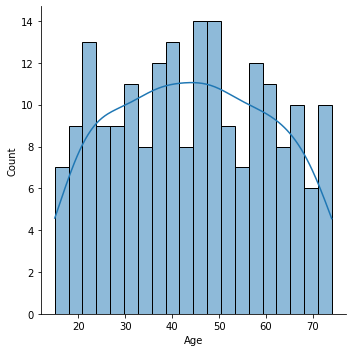

In [129]:
sns.displot(data=df, x = 'Age', bins=20, kde=True)
# Data consists of values from 15 to 74 age and we have a good samples for all age bins

In [130]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

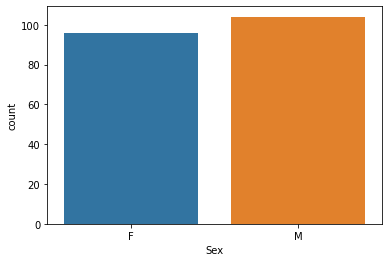

In [131]:
sns.countplot(data=df, x = 'Sex')
# Both male and female have similar data size, with male being marginally more

In [132]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

<AxesSubplot:xlabel='BP', ylabel='count'>

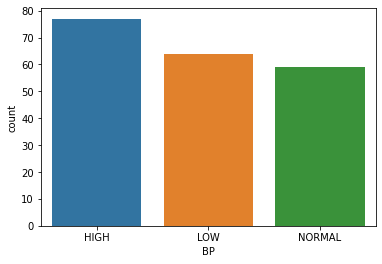

In [133]:
sns.countplot(data=df, x = 'BP')
# Patients with high BP are more in count, next being low BP and Normal ones

In [134]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

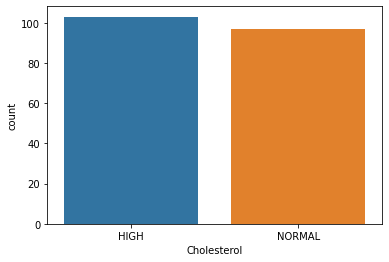

In [135]:
sns.countplot(data=df, x = 'Cholesterol')
# More people have High cholestrol comapred to normal ones

In [136]:
print('Max of Age : ', df.Na_to_K.max())
print('Min of Age : ', df.Na_to_K.min())

Max of Age :  38.247
Min of Age :  6.269


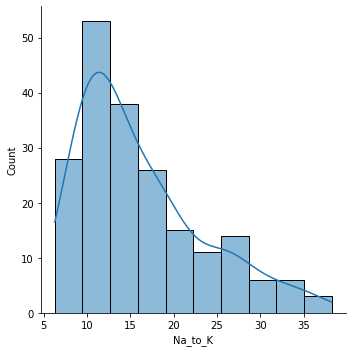

In [137]:
sns.displot(data=df, x = 'Na_to_K', bins=10, kde=True)
# we have values with very low to very high Na_to_K values

In [138]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<AxesSubplot:xlabel='Drug', ylabel='count'>

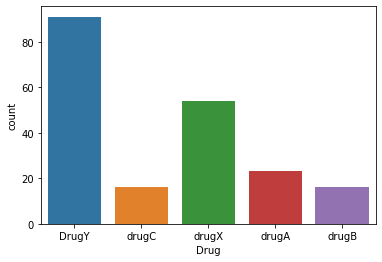

In [139]:
sns.countplot(data=df, x = 'Drug')
# DrugY, DrugX are highly used compared other drugs

### 3. Multivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Na_to_K'>

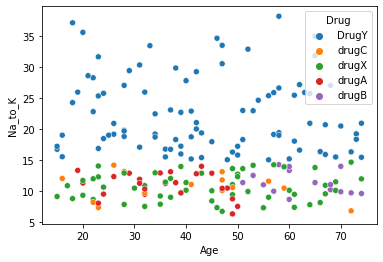

In [140]:
sns.scatterplot(data=df, x='Age', y='Na_to_K', hue='Drug')

# Here we can make clear classification that Na_to_K ratio greater than 16 are using DrugY Others Drugs are below that level
# DrugB is specifically seen for age group 50 above
# DrugA is specifically seen for age group 20 to 50 age group
# DrugX and Drug C seem all over